<a href="https://colab.research.google.com/github/yash2046/2216101_bootcamp_ml-concepts/blob/main/BULLY_COMMENTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


In [6]:
df = pd.read_json("/content/drive/MyDrive/dataset.json", lines= True)

In [7]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [8]:
df.shape

(20001, 3)

DATA PROCESSING

In [9]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])
df

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1
...,...,...,...,...
19996,I dont. But what is complaining about it goi...,"{'notes': '', 'label': ['0']}",NaN,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,"{'notes': '', 'label': ['0']}",NaN,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,"{'notes': '', 'label': ['0']}",NaN,0
19999,What&;s something unique about Ohio? :),"{'notes': '', 'label': ['0']}",NaN,0


DROPPING THE COLUMNS WHICH ARE NOT NECESSARY

In [10]:
df=df.drop(['annotation','extras'],axis='columns')

In [11]:
df

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [12]:
bully = df[df.label==1]
nonbully = df[df.label==0]

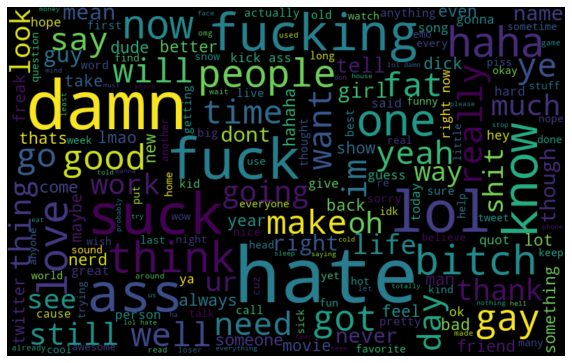

In [13]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
all_words=' '.join([text for text in df['content']])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

average length of comment:67.709


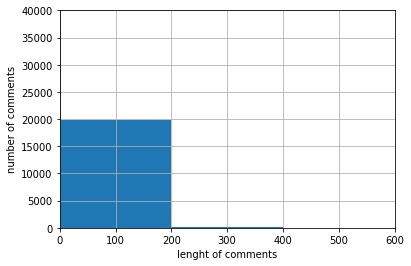

In [14]:
comment=df['content']
x=[len(comment[i]) for i in range(comment.shape[0])]
print('average length of comment:{:.3f}'.format(sum(x)/len(x)))
bins=[1,200,400,600]
plt.hist(x,bins=bins)
plt.xlabel('lenght of comments')
plt.ylabel('number of comments')
plt.axis([0,600,0,40000])
plt.grid(True)
plt.show()

In [15]:
import nltk
nltk.download(['punkt', 'wordnet'])

import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [16]:
def load_data(path):
    df = pd.read_json(path, lines= True)
    
    df["label"] = df.annotation.apply(lambda x: x.get('label'))
    df["label"] = df.label.apply(lambda x: x[0])
    
    X = df.content.values
    y = df.label.values
    
    return X, y

In [20]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> D

Download which package (l=list; x=cancel)?
  Identifier> omw-1.4


      Unzipping corpora/omw-1.4.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> Q


True

In [18]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def tokenize(text):

    tokens = word_tokenize(text)
    print("by doing tokenization")
    print(tokens)

    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    print("after performing lemmatization:")
    return clean_tokens

In [21]:
tokenize("whoa stops you's stupid sjw")

by doing tokenization
['whoa', 'stops', 'you', "'s", 'stupid', 'sjw']
after performing lemmatization:


['whoa', 'stop', 'you', "'s", 'stupid', 'sjw']

In [22]:
vect = CountVectorizer(tokenizer=tokenize)
vect

CountVectorizer(tokenizer=<function tokenize at 0x7faa0d827c20>)

In [23]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *

DECISION TREE CLASSIFIER


In [24]:
url = '/content/drive/MyDrive/dataset.json'
X, y = load_data(url)
X_train, X_test, y_train, y_test = train_test_split(X, y)

vect = CountVectorizer(tokenizer=tokenize)
tfidf = TfidfTransformer()
clf = DecisionTreeClassifier()

    # train classifier
X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)
clf.fit(X_train_tfidf, y_train)

    # predict on test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
#Score = clf.score((X_test_tfidf,y_test)

labels = np.unique(y_pred)
confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
accuracy = (y_pred == y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Score:",accuracy*100)

Streaming output truncated to the last 5000 lines.
['also', 'you', 'claim', 'you', 'wo', "n't", 'change', 'who', 'you', 'are', '.', 'but', 'i', 'want', 'you', 'to', 'change', 'from', 'a', 'guinea', 'pig', 'into', 'a', 'monkey', '.', 'monkeys', 'are', 'awesome', '!', '!', '!']
after performing lemmatization:
by doing tokenization
['you', "'ll", 'get', 'through', 'it', 'and', 'win', 'in', 'the', 'end', '.', 'fuck', 'that', 'shit', 'in', 'the', 'face', '(', 'as', 'ange', 'sez', ')', '!']
after performing lemmatization:
by doing tokenization
['favorite', 'color', '?']
after performing lemmatization:
by doing tokenization
['/nerd', '*', 'laugh', '*']
after performing lemmatization:
by doing tokenization
['now', 'i', "'m", 'hungry', '.', 'damn', 'you', 'people', 'and', 'your', 'midnight', 'snack', 'tweets', '!']
after performing lemmatization:
by doing tokenization
['what', 'do', 'you', 'think', 'about', 'this', 'in', 'regards', 'to', 'your', 'nerd', 'daily', 'lists', ':', 'http', ':', '//is